In [132]:
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

df = pd.read_csv("Laptop_price.csv")

df.head(10)

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
5,HP,1.881348,16,256,11.943958,4.840268,9543.719980
6,Lenovo,2.940721,32,256,11.713246,4.344846,10390.137319
7,Lenovo,3.016788,4,256,15.588315,2.941120,9214.484506
8,Lenovo,2.560327,4,512,15.026332,2.743620,16372.175284
9,Acer,3.341111,32,512,13.611945,4.093149,18501.832733


In [134]:
df.shape

(1000, 7)

In [135]:
df.dtypes

Brand                object
Processor_Speed     float64
RAM_Size              int64
Storage_Capacity      int64
Screen_Size         float64
Weight              float64
Price               float64
dtype: object

<Axes: >

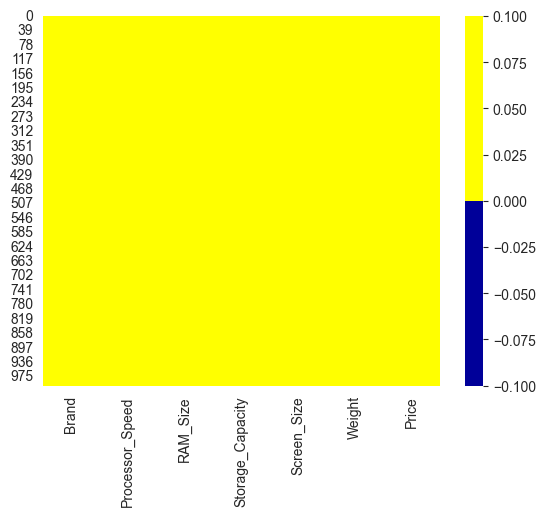

In [136]:
# Тепловая карта пропущенных значений
cols = df.columns
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [137]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Brand - 0%
Processor_Speed - 0%
RAM_Size - 0%
Storage_Capacity - 0%
Screen_Size - 0%
Weight - 0%
Price - 0%


In [138]:
df.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


In [139]:
duplicatedRows = df[df.duplicated()]
duplicatedRows

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price


# Поиск аномалий (выбросов)
## 1. Гистограмма
Построим гистограмму для каждого столбца. В качестве оптимального числа разбиения n для столбца используется правило Стерджеса

Number of bins: 10


array([[<Axes: title={'center': 'Processor_Speed'}>,
        <Axes: title={'center': 'RAM_Size'}>],
       [<Axes: title={'center': 'Storage_Capacity'}>,
        <Axes: title={'center': 'Screen_Size'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

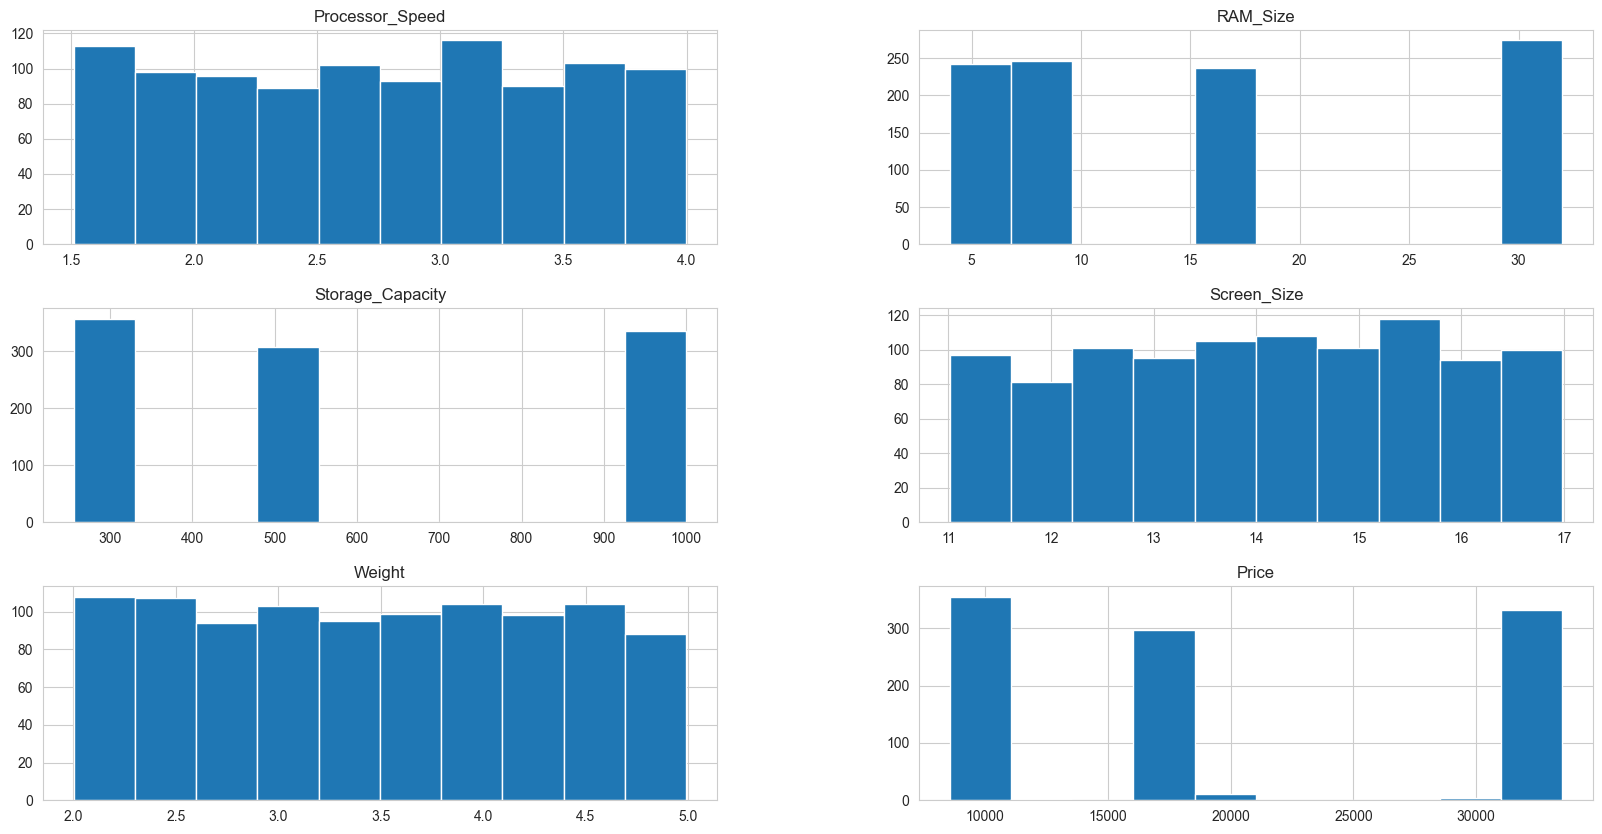

In [140]:
num_rows = df.shape[0]
n = int(1 + math.log(num_rows, 2))
print('Number of bins: ' + str(n))
df.hist(bins=n, figsize=(20,10))

## 2. Диаграмма размаха

<Axes: >

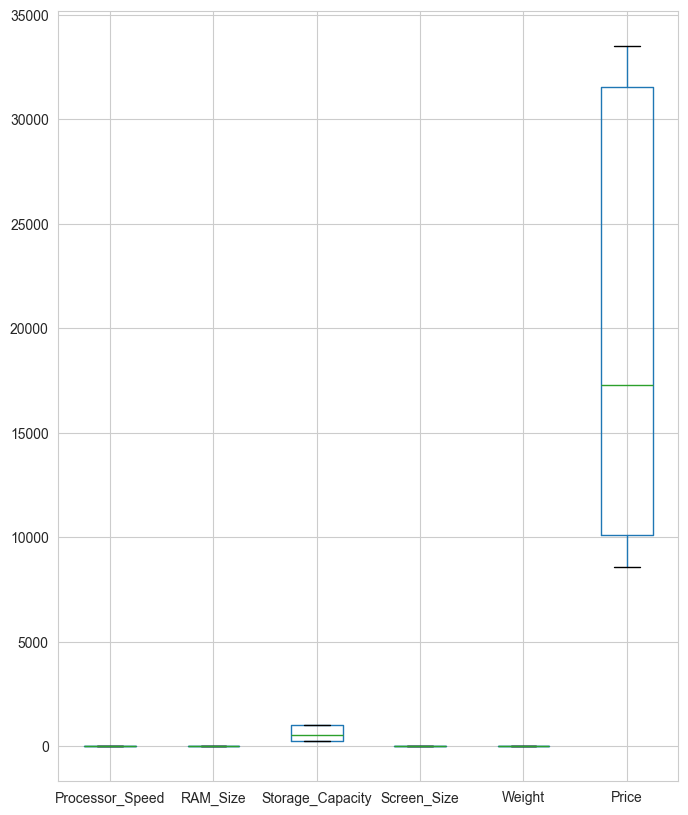

In [141]:
df.boxplot(['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight', 'Price'], figsize=(8, 10))

# Удаление сильно зависимых признаков
## Матрица корреляции

Для начала преобразуем категориальный признак "Brand" в числовой

In [142]:
df['Brand'].unique()

array(['Asus', 'Acer', 'Lenovo', 'HP', 'Dell'], dtype=object)

In [143]:
df['Brand'].replace(['Asus', 'Acer', 'Lenovo', 'HP', 'Dell'], [0, 1, 2, 3, 4], inplace=True)
df['Brand'] = df['Brand'].astype('int64')
df.dtypes

C:\Users\osipo\AppData\Local\Temp\ipykernel_18340\3852304607.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Brand'].replace(['Asus', 'Acer', 'Lenovo', 'HP', 'Dell'], [0, 1, 2, 3, 4], inplace=True)
C:\Users\osipo\AppData\Local\Temp\ipykernel_18340\3852304607.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_down

Brand                 int64
Processor_Speed     float64
RAM_Size              int64
Storage_Capacity      int64
Screen_Size         float64
Weight              float64
Price               float64
dtype: object

In [144]:
df.head(5)

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,0,3.830296,16,512,11.185147,2.641094,17395.093065
1,1,2.912833,4,1000,11.311372,3.260012,31607.605919
2,2,3.241627,4,256,11.853023,2.029061,9291.023542
3,1,3.806248,16,512,12.280360,4.573865,17436.728334
4,1,3.268097,32,1000,14.990877,4.193472,32917.990718


Теперь получим корреляционную матрицу

In [145]:
df.corr()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
Brand,1.000000,-0.026002,0.047284,-0.040916,-0.001499,-0.007706,-0.039683
Processor_Speed,-0.026002,1.000000,0.021391,-0.067576,-0.013425,-0.054603,-0.050737
RAM_Size,0.047284,0.021391,1.000000,0.002111,-0.036002,-0.025382,0.061237
Storage_Capacity,-0.040916,-0.067576,0.002111,1.000000,-0.027560,0.041335,0.997908
Screen_Size,-0.001499,-0.013425,-0.036002,-0.027560,1.000000,0.021995,-0.026740
Weight,-0.007706,-0.054603,-0.025382,0.041335,0.021995,1.000000,0.038417
Price,-0.039683,-0.050737,0.061237,0.997908,-0.026740,0.038417,1.000000


<Axes: >

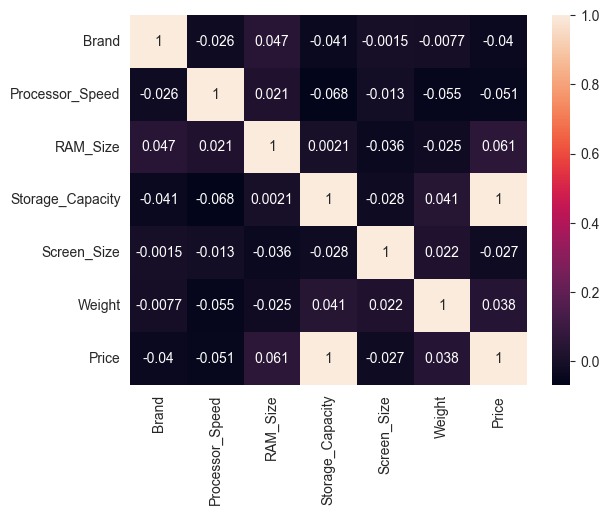

In [146]:
sns.heatmap(df.corr(), annot = True)

Как видим, наблюдается полная корреляция между признаками Price и Storage_Capacity. Поэтому от признака Storage_Capacity можем полностью избавиться.

In [147]:
df = df.drop('Storage_Capacity', axis=1)
df.head(3)

,Brand,Processor_Speed,RAM_Size,Screen_Size,Weight,Price
0,0,3.830296,16,11.185147,2.641094,17395.093065
1,1,2.912833,4,11.311372,3.260012,31607.605919
2,2,3.241627,4,11.853023,2.029061,9291.023542


# Поиск наиболее важных признаков

Подберем интервалы разбиения для 'Price' так, чтобы разбиение было равномерным

<Axes: xlabel='Price', ylabel='Count'>

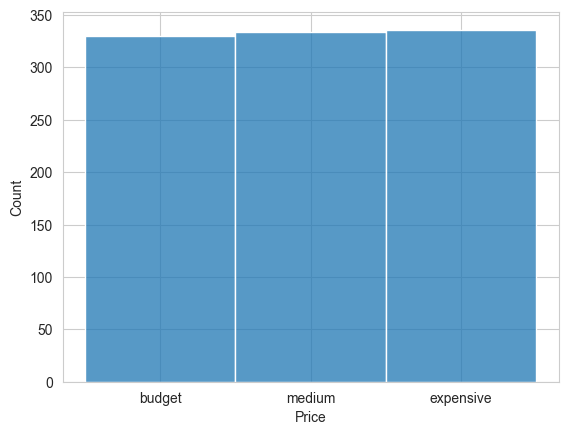

In [148]:
df['Price'] = pd.cut(df['Price'],
                    bins=[0, 10720, 29000, float('inf')],
                    labels=['budget', 'medium', 'expensive'])

sns.histplot(data=df, x='Price', discrete=True)

In [149]:
from ds_info import convert_num_by_sturges, gain_ratio
    
df['Processor_Speed'] = pd.cut(df['Processor_Speed'],
                                   [1.5, 2.0, 2.5, 3.0, 3.5, 4.0],
                                   labels=['1.5-2.0', '2.0-2.5', '2.5-3.0', '3.0-3.5', '3.5-4.0'])

df['Screen_Size'] = pd.cut(df['Screen_Size'], [11, 14, 16, 17], labels=['Small', 'Medium', 'Large'])

df['Weight'] = convert_num_by_sturges('Weight', df)

for attribute in df:
    if attribute != 'Price':
        print('GainRatio({}) = {}'.format(attribute, gain_ratio(df[attribute], df['Price'])))

GainRatio(Brand) = 0.002705880023765061
GainRatio(Processor_Speed) = 0.0022634730188765225
GainRatio(RAM_Size) = 0.006042799312994491
GainRatio(Screen_Size) = 0.0023908426810301275
GainRatio(Weight) = 0.0014444165251896737


Отсюда видно, что наибольшим коэффициентом усиления обладает атрибут 'RAM_Size', на втором месте 'Brand'